<a href="https://colab.research.google.com/github/SebastianLarssonDTU/02456-Reinforcement-Learning-Project/blob/before_framestacking/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INIT : Procgen, Drive, Git

In [1]:
!pip install procgen

     |████████████████████████████████| 39.9MB 104kB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 22.2MB 1.4MB/s 
     |████████████████████████████████| 204kB 54.5MB/s 
     |████████████████████████████████| 3.3MB 48.0MB/s 
     |████████████████████████████████| 665kB 39.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [2]:
#Clone git
!git clone -b before_framestacking https://github.com/SebastianLarssonDTU/02456-Reinforcement-Learning-Project.git "my_project"

Cloning into 'my_project'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 688 (delta 136), reused 3 (delta 0), pack-reused 460
Receiving objects: 100% (688/688), 17.36 MiB | 6.33 MiB/s, done.
Resolving deltas: 100% (419/419), done.


In [3]:
#update git
%cd /content/my_project
! git pull

/content/my_project
Already up to date.


In [4]:
import datatools as tools
from datatools import DATA_PATH, MODEL_PATH
#Mount drive
tools.mount_drive()

Mounted at /content/drive


# Imports

In [5]:
#Import all custom files
import baseline
import datatools as tools
import hyperparameters as h
import model
import my_util
import policy
import ppo
import utils

#other imports
import torch

#import specific methods
from baseline import set_hyperparameters
from ppo import PPO
from experiments import run_experiment, print_list_of_experiments


In [6]:
print_list_of_experiments()

***** Experiment 0 *****
Description:    Baseline inspired by PPO article
***** Experiment 1 *****
Description:    Baseline inspired by Procgen article
***** Experiment 2 *****
Description:    Modified PPO baseline with value clipping enabled
***** Experiment 3 *****
Description:    Modified PPO baseline with value clipping enabled and learning rate given by par variable
***** Experiment 4 *****
Description:    Modified PPO baseline with value clipping enabled and reward penalty on death (1 as default)
***** Experiment 5 *****
Description:    Baseline inspired by IMPALA paper (No value clipping)
***** Experiment 6 *****
Description:    Inspired by IMPALA paper (With value clipping)
***** Experiment 7 *****
Description:    Inspired by both IMPALA and Procgen papers (With value clipping)
***** Experiment 8 *****
Description:    Inspired by both IMPALA and Procgen papers (With value clipping) and added death penalty


# Create INDEX



In [7]:
INDEX = tools.create_index_table_from_txt_files()
INDEX

total_steps num_envs  ... Time spent Last Mean Reward
 Value    8000000.0       32  ...    5:14:18         20.34375
 Value    8000000.0       32  ...    5:30:18         19.53125
 Value    8000000.0       32  ...    5:41:20         28.15625
 Value    8000000.0       32  ...    5:46:59          25.8125
 Value    8000000.0       32  ...        NaN             23.0
 Value    8000000.0       32  ...        NaN             24.5
 Value    8000000.0       32  ...    8:55:30         16.28125
 Value    8000000.0       32  ...    9:30:41         24.15625
 Value    8000000.0       32  ...        NaN         22.03125
 Value    8000000.0       32  ...    7:33:30         29.71875
 Value    8000000.0       32  ...    7:50:29           30.375
 Value    8000000.0       32  ...        NaN            23.75
 Value    8000000.0       32  ...        NaN         23.84375
 Value    8000000.0       32  ...    7:58:57          26.8125
 Value    8000000.0       32  ...        NaN         21.15625
 Value    8000000.0       32  ...        NaN            23.25
 Value    8000000.0       32  ...    8:17:39         26.40625
 Value    8000000.0       32  ...        NaN             21.5
 Value    8000000.0       32  ...        NaN            17.75
 Value    8000000.0       32  ...        NaN            20.75
 Value    8000000.0       32  ...        NaN         24.71875
 Value    8000000.0       32  ...        NaN         22.90625
 Value   14004736.0       32  ...        NaN           20.625
 Value   12505600.0       32  ...        NaN          23.9375
 Value    8000000.0       32  ...        NaN           17.375
 Value   21516800.0       32  ...        NaN         24.15625
 Value   21516800.0       32  ...        NaN         27.21875
 Value    8000000.0       32  ...        NaN           16.125
 Value    8000000.0       32  ...        NaN          22.3125
 Value   12005888.0       32  ...        NaN           23.875
 Value    9007616.0       32  ...        NaN          22.9375
 Value   11506176.0       32  ...        NaN         26.28125
 Value    8000000.0       32  ...        NaN         24.15625
 Value    8000000.0       32  ...        NaN         27.21875
 Value    8000000.0       32  ...        NaN         22.65625
 Value    8000000.0       32  ...        NaN          25.8125
 Value    8000000.0       32  ...        NaN         21.34375
 Value    8000000.0       32  ...        NaN      Mean reward
 Value    8000000.0       32  ...        NaN         15.71875
 Value   13505024.0       32  ...        NaN         24.59375
 Value   13005312.0       32  ...        NaN           24.875
 Value   12014080.0       32  ...        NaN         22.96875
 Value   13021696.0       32  ...        NaN             24.5
 Value   15012352.0       32  ...        NaN          23.3125
 Value   15012352.0       32  ...        NaN          24.5625
 Value   15512064.0       32  ...        NaN          22.4375
 Value   15520256.0       32  ...        NaN          24.8125
 Value    8000000.0       32  ...        NaN           7.1875
 Value    8000000.0       32  ...        NaN         17.71875
 Value   16527872.0       32  ...        NaN            23.25

[50 rows x 30 columns]

In [8]:
import glob

file_names = [x.strip() for x in INDEX['file_name']]
n = len(file_names)
# for i in range(n):
#   file_names.append(INDEX['file_name'][-1-i].strip())

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def plot_training_graphs(file_names, legend = None):
  base = 32*256
  df = pd.DataFrame(columns=file_names)
  
  # df['Step'] = pd.read_csv(DATA_PATH + INDEX["file_name"][0].strip()+".csv")["Step"]  #This only works as long as they all have the same steps!
  
  for file_name in file_names:
    df[file_name] = pd.read_csv(DATA_PATH + file_name+".csv")[" Mean reward"]
  max_length = len(df)  
  df.insert(0, "Step", [base*(i+1) for i in range(max_length)])
  df = df.set_index('Step')

  plt.figure(figsize=(16, 10))
  sns.lineplot(data = df)
  if legend is not None:
    plt.legend(labels=[legend[x] for x in file_names])
  plt.title("Training")

def plot_eval_graphs(file_names, legend = None):
  base = 32*256*16
  df = pd.DataFrame(columns=file_names)
  for file_name in file_names:
    temp = pd.read_csv(DATA_PATH + file_name+"_EVAL.csv")
    df[file_name] = temp["avg"]
  
  max_length = len(df)  
  df.insert(0, "Step", [base*(i+1) for i in range(max_length)])
  df = df.set_index('Step')
  
  plt.figure(figsize=(16, 10))
  sns.lineplot(data = df)
  if legend is not None:
    plt.legend(labels=[legend[x] for x in file_names])
  plt.title("Eval")
  # return df

In [10]:
for i in range(len(file_names)):
  print("[{:2d}]: {}".format(i, file_names[i]))

[ 0]: Experiment0_Run_26Nov_15h21m41s
[ 1]: Experiment1_Run_26Nov_15h22m38s
[ 2]: Experiment2_Run_27Nov_11h05m48s
[ 3]: Experiment4_Run_27Nov_11h07m20s
[ 4]: Experiment3_Run_27Nov_18h03m39s
[ 5]: Experiment4_Run_27Nov_18h11m00s
[ 6]: Experiment5_Run_27Nov_16h37m42s
[ 7]: Experiment6_Run_28Nov_12h09m43s
[ 8]: Experiment3_Run_29Nov_16h30m27s
[ 9]: Experiment7_Run_30Nov_14h45m32s
[10]: Experiment8_Run_30Nov_22h21m06s
[11]: Experiment7_100levels_Run_02Dec_09h29m48s
[12]: Experiment8_50levels_Run_02Dec_17h18m34s
[13]: Experiment8_10levels_Run_02Dec_09h48m26s
[14]: Experiment2_100levels_Run_03Dec_10h48m24s
[15]: Experiment8_50levels_Run_03Dec_14h53m09s
[16]: Experiment8_10levels_Run_03Dec_11h04m34s
[17]: Experiment8_50levels_Run_04Dec_06h17m22s
[18]: Experiment4_50levels_Run_04Dec_08h02m21s
[19]: Experiment2_50levels_Run_04Dec_18h10m32s
[20]: Experiment7_50levels_Run_04Dec_18h12m45s
[21]: Experiment8_50levels_Run_05Dec_08h34m02s
[22]: Experiment2_50levels_Run_04Dec_18h10m32s_loaded_05Dec_09h

# Creating legend

In [11]:
legend = {}

In [78]:
""" 10 levels """
#Procgen (0)
procgen = "Experiment1_Run_26Nov_15h22m38s"
legend[procgen] = "procgen"


#PPO (1,2,3)
ppo_base = "Experiment0_Run_26Nov_15h21m41s"
legend[ppo_base] = "No value clipping"

ppo_value_clipped = "Experiment2_Run_27Nov_11h05m48s"
legend[ppo_value_clipped] = "With value clipping (0.2)"

#PPO w. death penalty (4)
ppo_death1 = "Experiment4_Run_27Nov_11h07m20s"
legend[ppo_death1] = "ppo_death1"

ppo_death3 = "Experiment4_Run_27Nov_18h11m00s"
legend[ppo_death3] = "ppo_death3"

#Impala (5,6,7)
impala_baseline = "Experiment5_Run_27Nov_16h37m42s"
legend[impala_baseline] = "Batch size 32 w.o. clip"

impala_value_clipped = "Experiment6_Run_28Nov_12h09m43s"
legend[impala_value_clipped] = "Batch size 32 w. clip" 

impala_modified = "Experiment7_Run_30Nov_14h45m32s"
legend[impala_modified] ="Batch size 512 w. clip"

#Impala w. death penalty (8)
impala_death1 = "Experiment8_Run_30Nov_22h21m06s"
legend[impala_death1] ="1"

impala_death3 = "Experiment8_10levels_Run_02Dec_09h48m26s"
legend[impala_death3] ="3"

impala_death5 = "Experiment8_10levels_Run_07Dec_18h17m17s_combined"
legend[impala_death5] ="5"

impala_death7 = "Experiment8_10levels_Run_03Dec_11h04m34s"
legend[impala_death7] ="7"


In [13]:
""" 50 levels """
#PPO (1,2,3)
ppo_value_clipped_50 = "Experiment2_50levels_Run_04Dec_18h10m32s_combined"
legend[ppo_value_clipped_50] = "ppo_value_clipped_50"

#PPO w. death penalty (4)
ppo_death5_50 = "Experiment4_50levels_Run_04Dec_08h02m21s"
legend[ppo_death5_50] = "ppo_death5_50"

#Impala (5,6,7)
impala_modified_50 = "Experiment7_50levels_Run_04Dec_18h12m45s_combined"
legend[impala_modified_50] ="impala_modified_50"

#Impala w. death penalty (8)
impala_death1_50 = "Experiment8_50levels_Run_02Dec_17h18m34s"
legend[impala_death1_50] ="impala_death1_50"

impala_death5_50 = "Experiment8_50levels_Run_05Dec_08h34m02s_combined"
legend[impala_death5_50] ="impala_death5_50"

impala_death10_50 = "Experiment8_50levels_Run_04Dec_06h17m22s"
legend[impala_death10_50] ="impala_death10_50"

impala_death20_50 = "Experiment8_50levels_Run_06Dec_12h06m47s"
legend[impala_death20_50] ="impala_death20_50"

#impala DP + framestacking
impala_death5_50_w_fs = "Experiment8_50levels_Run_07Dec_23h32m28s"
legend[impala_death5_50_w_fs] ="impala_death5_50_w_fs"



In [14]:
""" 100 levels """
#PPO (1,2,3)
ppo_value_clipped_100 = "Experiment2_100levels_Run_03Dec_10h48m24s"
legend[ppo_value_clipped_100] = "ppo_value_clipped_100"


#PPO w. death penalty (4)

#Impala (5,6,7)
impala_modified_100 = "Experiment7_100levels_Run_02Dec_09h29m48s"
legend[impala_modified_100] ="impala_modified_100"

#Impala w. death penalty (8)



In [15]:
""" 200 levels """
#PPO (1,2,3)
ppo_value_clipped_200 = "Experiment2_200levels_Run_07Dec_13h49m13s_combined"
legend[ppo_value_clipped_200] = "ppo_value_clipped_200"


#PPO w. death penalty (4)

#Impala (5,6,7)
impala_modified_200 = "Experiment7_200levels_Run_06Dec_16h18m31s_combined"
legend[impala_modified_200] ="impala_modified_200"

#Impala w. death penalty (8)
impala_death5_200 = "Experiment8_200levels_Run_06Dec_16h17m59s_combined"
legend[impala_death5_200] ="impala_death5_200"


In [16]:
all_impalas = [impala_baseline, impala_value_clipped, impala_modified, impala_death1, impala_death3, impala_death5, impala_death7]

all_impala_modified = [impala_modified, impala_modified_50, impala_modified_100, impala_modified_200]

all_impala_death = [impala_death1, impala_death1_50, impala_death3, impala_death5_50, impala_death7, impala_death10_50, impala_death20_50, impala_death5_200, impala_death5, impala_death5_50_w_fs]

all_ppos = [ppo_base, ppo_value_clipped, ppo_death1, ppo_death3]
all_ppo_value_clipped = [ppo_value_clipped, ppo_value_clipped_50, ppo_value_clipped_100, ppo_value_clipped_200]

all_10 = all_ppos + all_impalas + [procgen]
all_50 = [impala_modified_50, impala_death5_50, impala_death1_50, impala_death10_50, ppo_death5_50, ppo_value_clipped_50, impala_death20_50, impala_death5_50_w_fs]
all_100 = [ppo_value_clipped_100, impala_modified_100]
all_200 =[impala_modified_200, impala_death5_200, ppo_value_clipped_200]


In [17]:
excluded=["Experiment7_50levels_Run_04Dec_18h12m45s",     #base for long run
          "Experiment2_50levels_Run_04Dec_18h10m32s"]     #base for long run

#which files are not in legend?
print("THe following files have not been added to the legend yet")
for file_name in file_names:
  if file_name not in legend:
    if "loaded" not in file_name and file_name not in excluded:
      print(file_name)
      ex = INDEX.iloc[file_names.index(file_name)]
      if "Experiment8" in file_name or "Experiment4" in file_name:
        print("\t ^death penalty" + str(ex['penalty'] +"^"))
      if "Experiment3" in file_name:
        print("\t ^learning rate" + str(ex['lr'] +"^"))

THe following files have not been added to the legend yet
Experiment3_Run_27Nov_18h03m39s
	 ^learning rate 0.0025^
Experiment3_Run_29Nov_16h30m27s
	 ^learning rate 2.5e-05^
Experiment8_50levels_Run_03Dec_14h53m09s
	 ^death penalty 5^
Experiment8_50levels_Run_05Dec_08h34m02s
	 ^death penalty 5^
Experiment8_200levels_Run_06Dec_16h17m59s
	 ^death penalty 5^
Experiment7_200levels_Run_06Dec_16h18m31s
Experiment2_200levels_Run_07Dec_13h49m13s
Experiment8_10levels_Run_07Dec_18h17m17s
	 ^death penalty 5^
Experiment8_10levels_Run_07Dec_19h33m37s
	 ^death penalty 5^
Experiment8_50levels_Run_07Dec_20h59m00s
	 ^death penalty 5^
HARD Experiment8_death_5_50levels_Run_08Dec_17h13m22s
	 ^death penalty 5^
HARD Experiment8_death_5_50levels_Run_08Dec_17h33m49s
	 ^death penalty 5^


# GRAPHS

## All trained on 10 levels

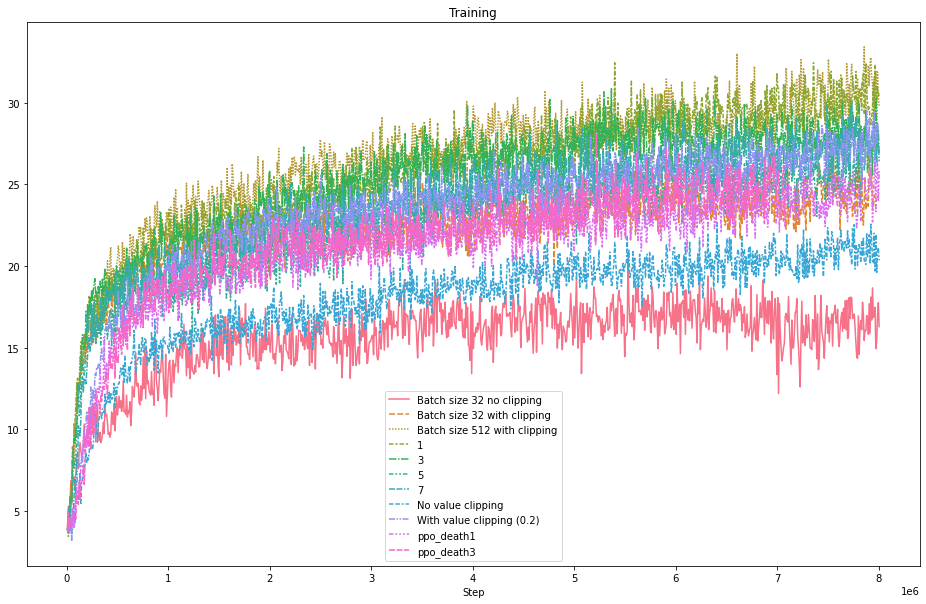

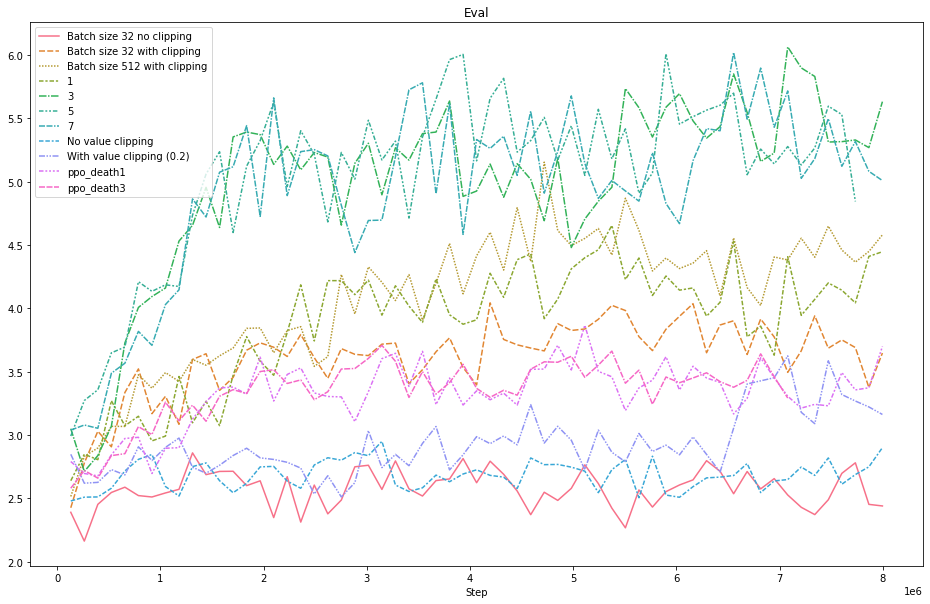

In [18]:
chosen_files = all_impalas + all_ppos
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## All IMPALA modified

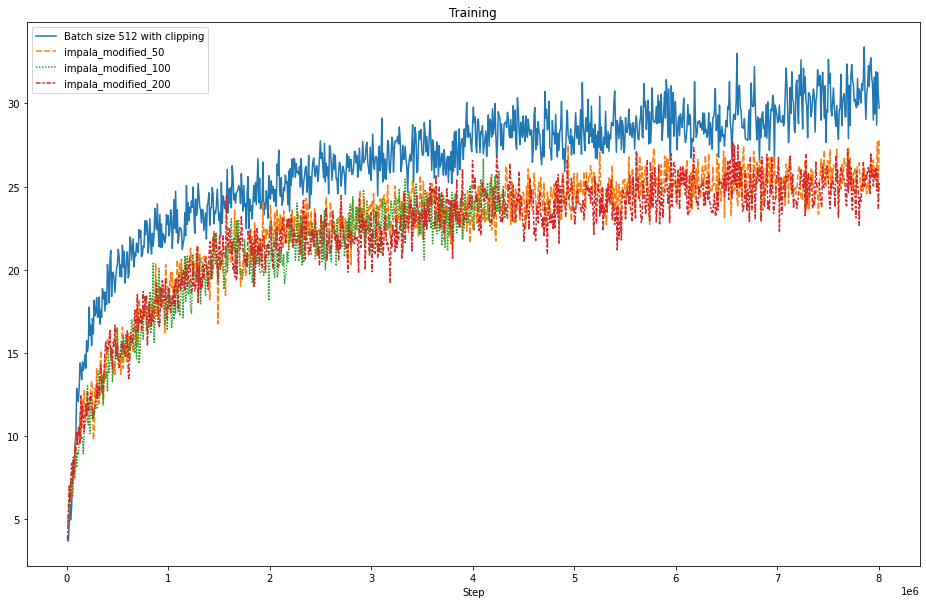

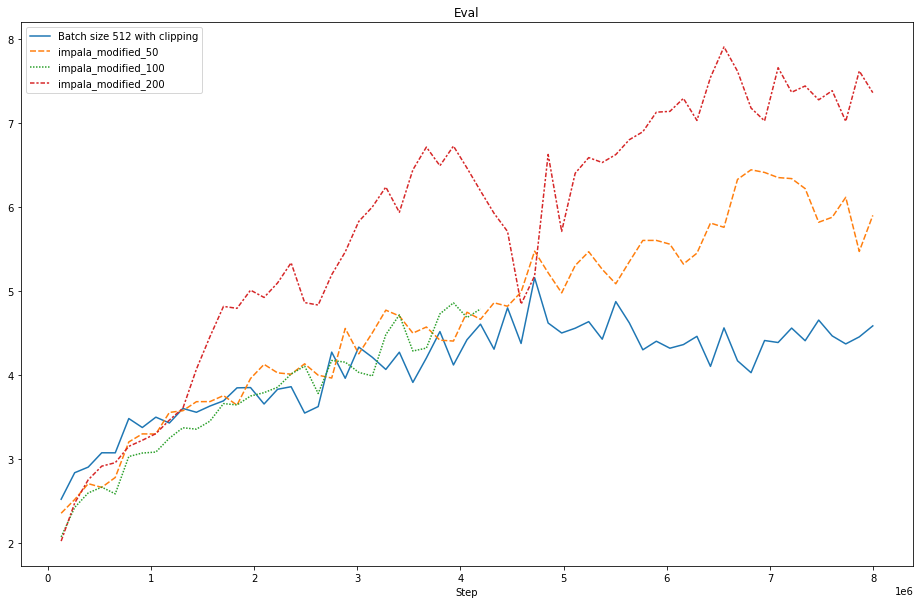

In [19]:
chosen_files = all_impala_modified
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## All PPO value clipped 

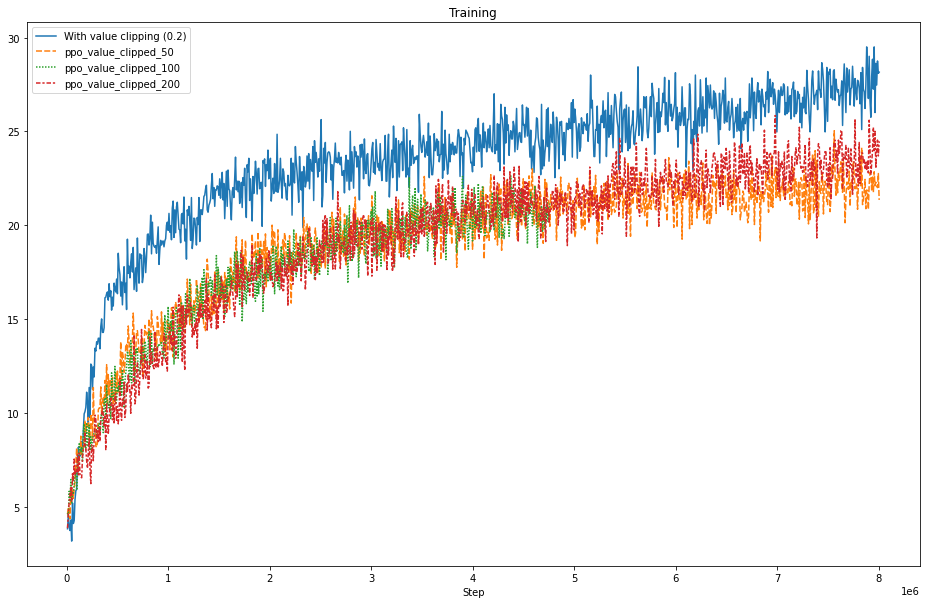

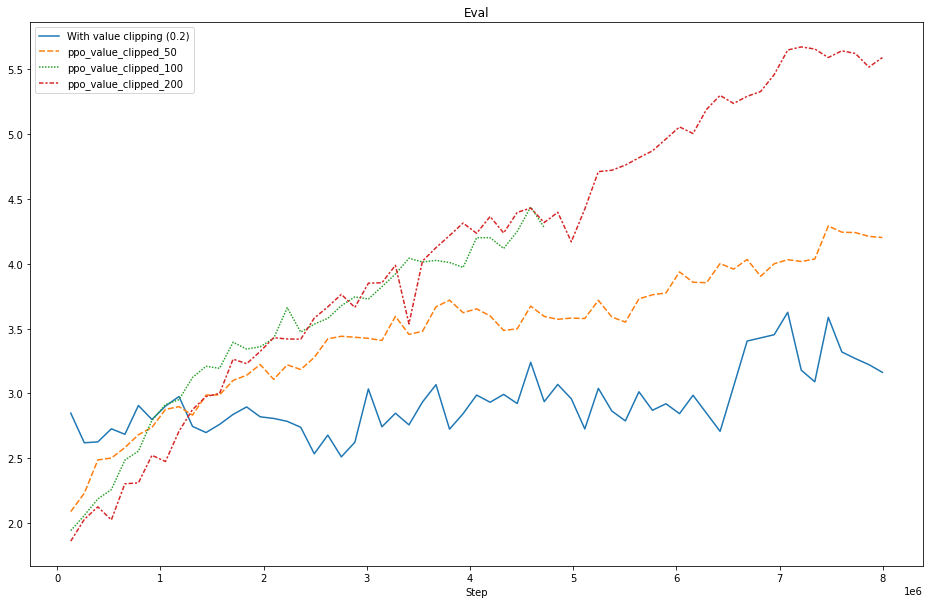

In [20]:
chosen_files = all_ppo_value_clipped
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## All IMPALA with death penalty

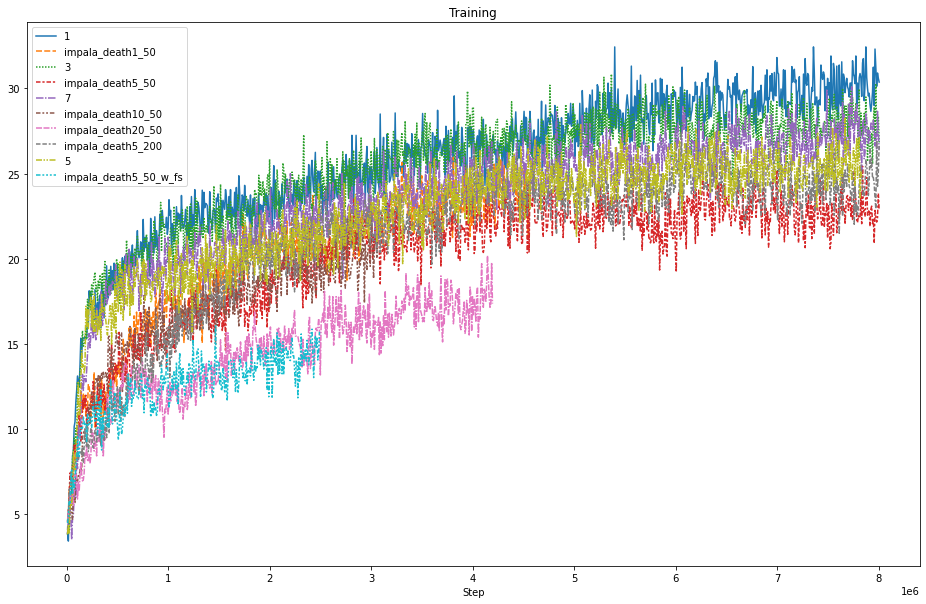

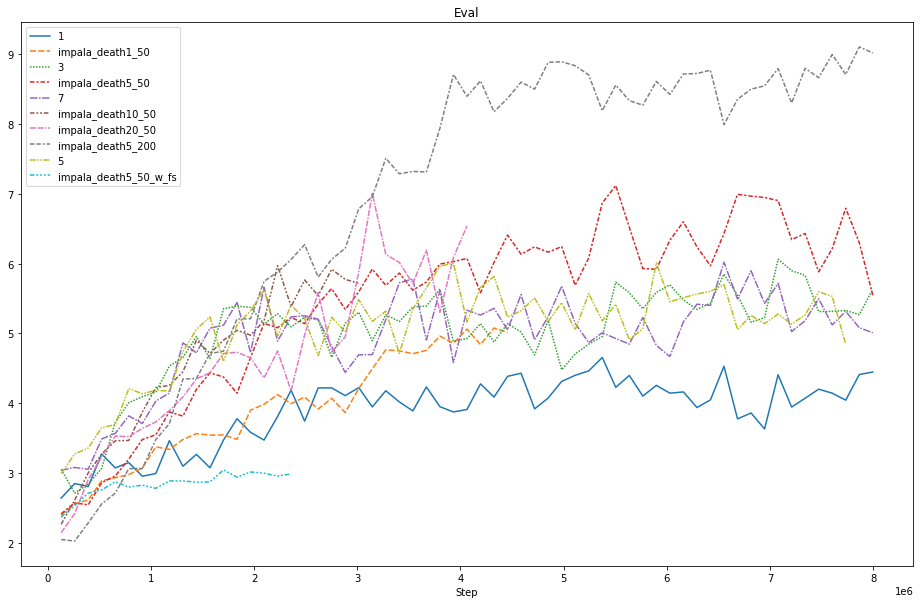

In [21]:
chosen_files = all_impala_death
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## All trained on 50 levels

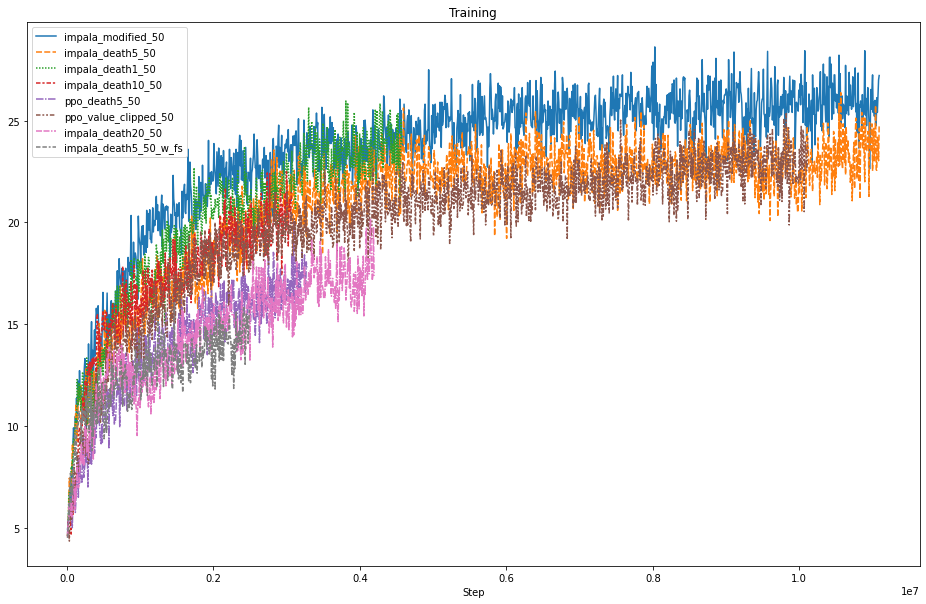

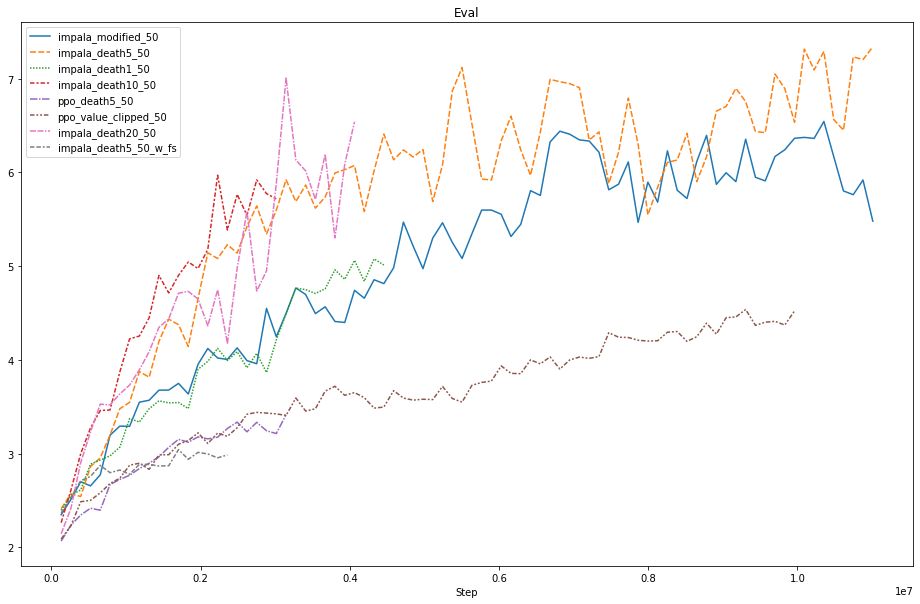

In [22]:
chosen_files = all_50
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)


## All trained on 100 levels

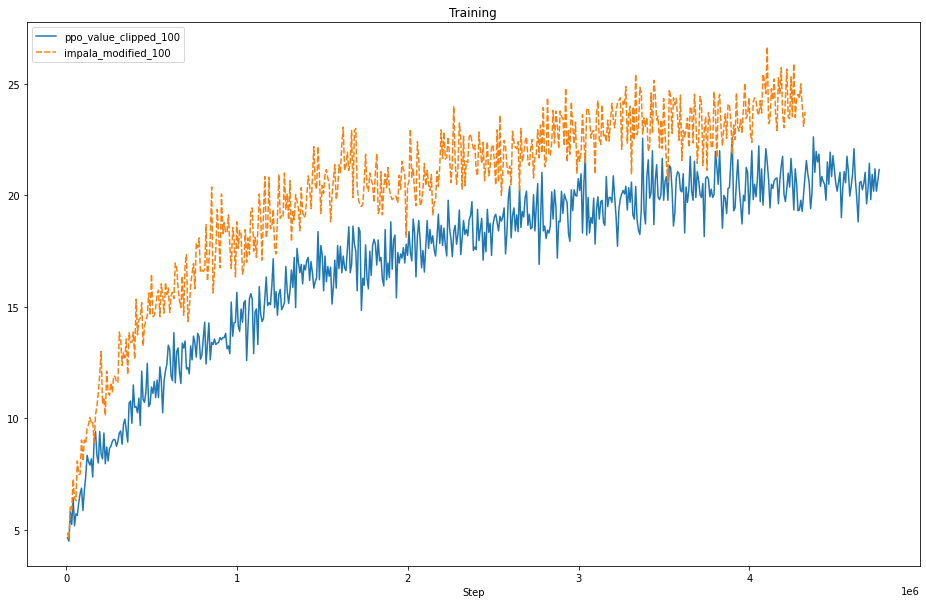

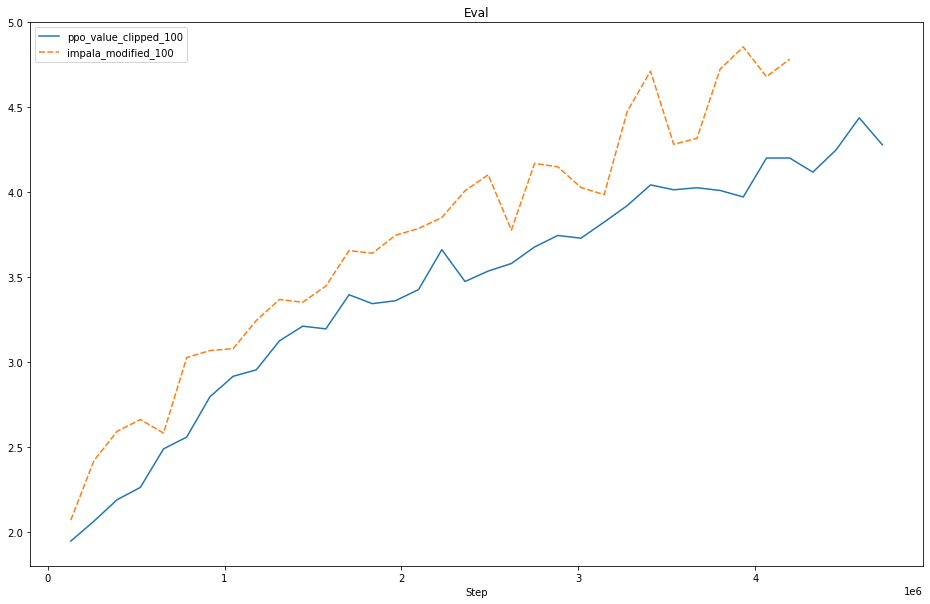

In [23]:
chosen_files = all_100
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)


## All trained on 200 levels

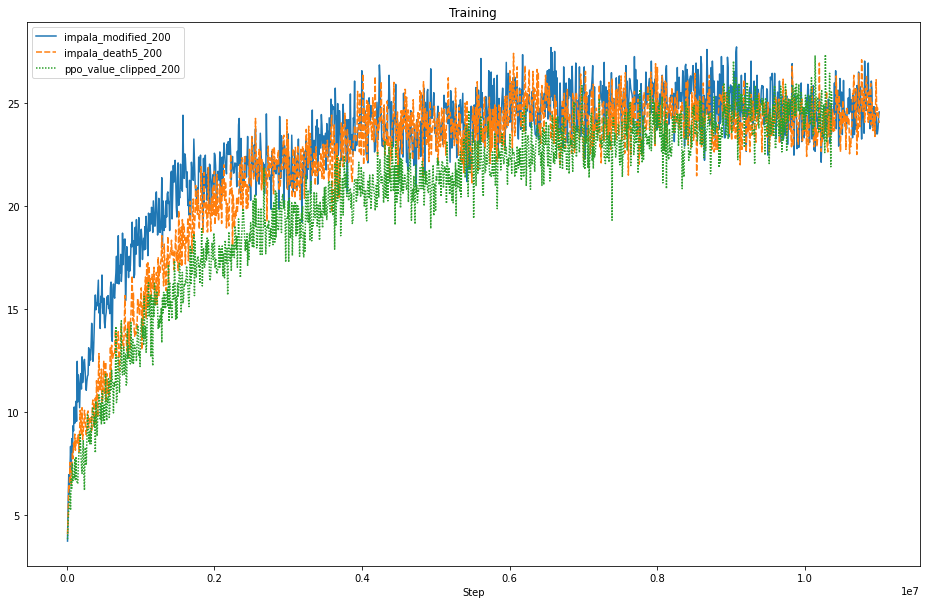

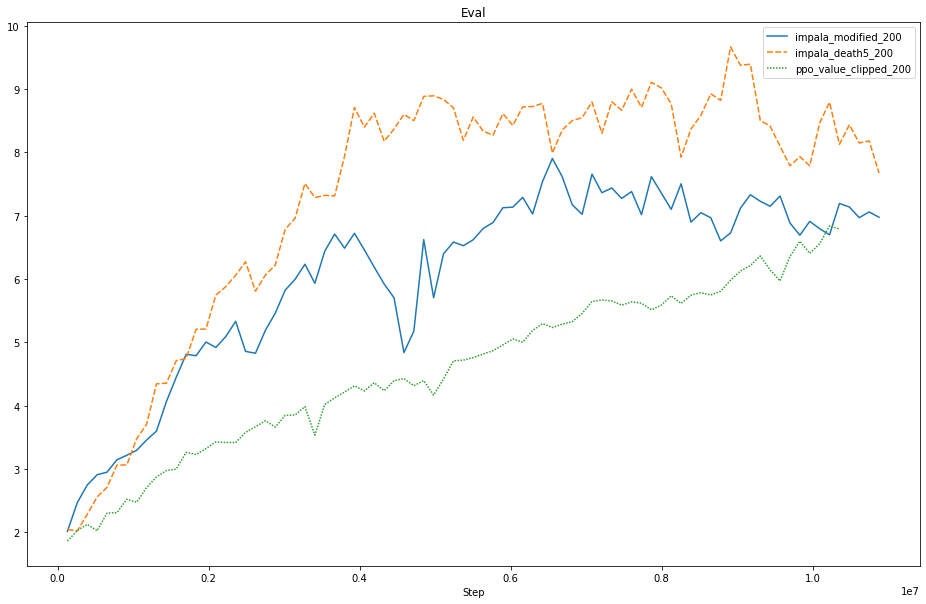

In [24]:
chosen_files = all_200
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)


## custom

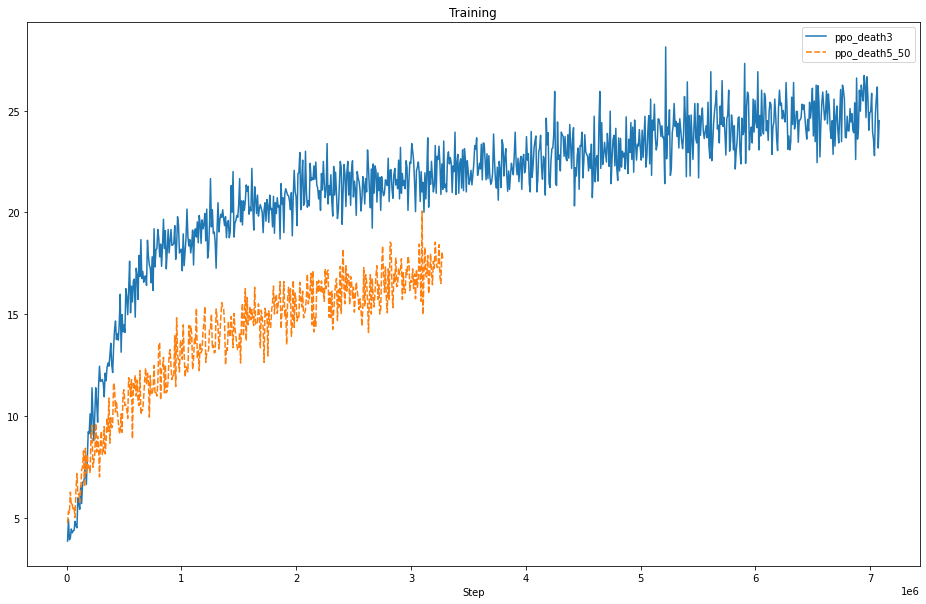

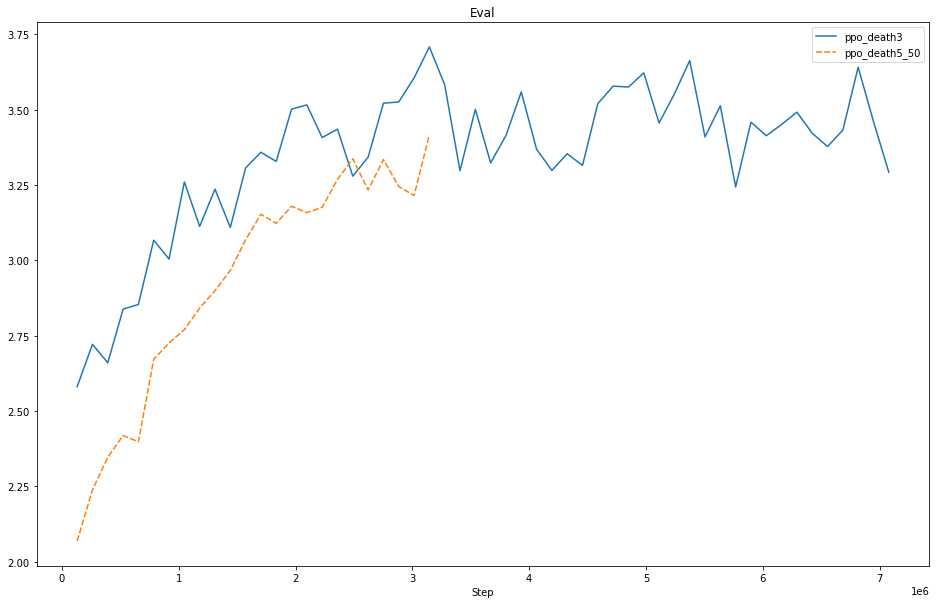

In [25]:
chosen_files = [ppo_death3, ppo_death5_50]
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)


# Cleaned up graphs

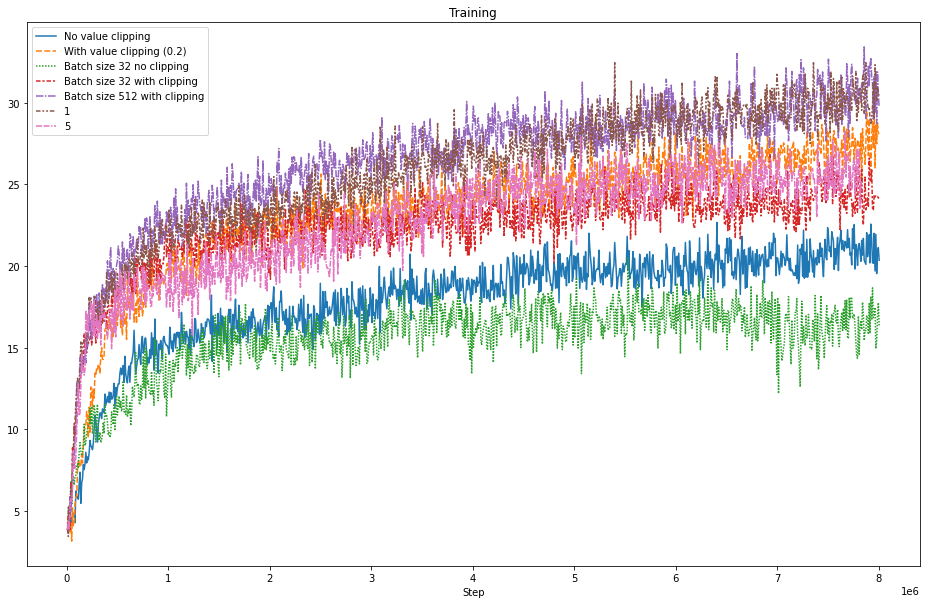

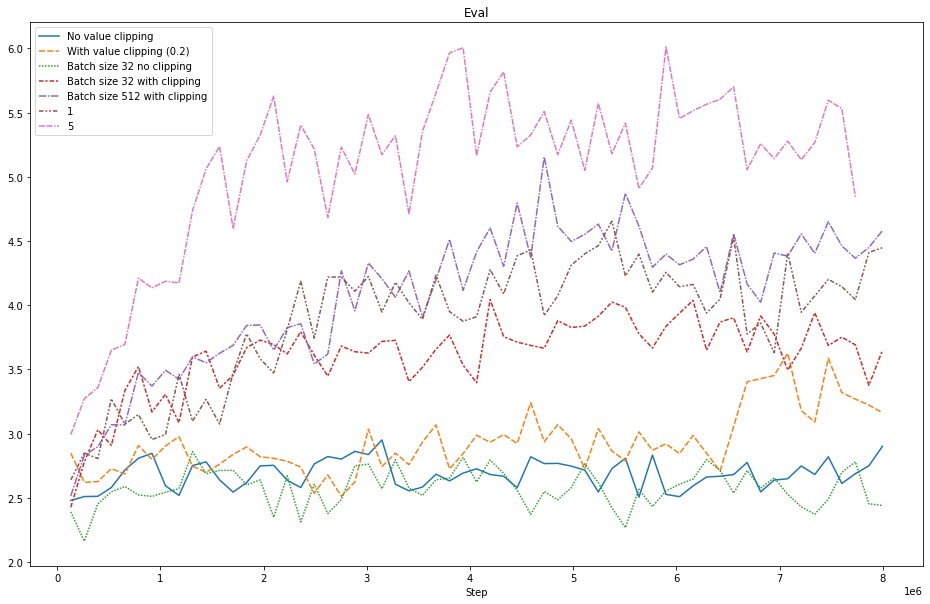

In [26]:
chosen_files = [ppo_base, ppo_value_clipped, impala_baseline, impala_value_clipped, impala_modified, impala_death1, impala_death5]
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

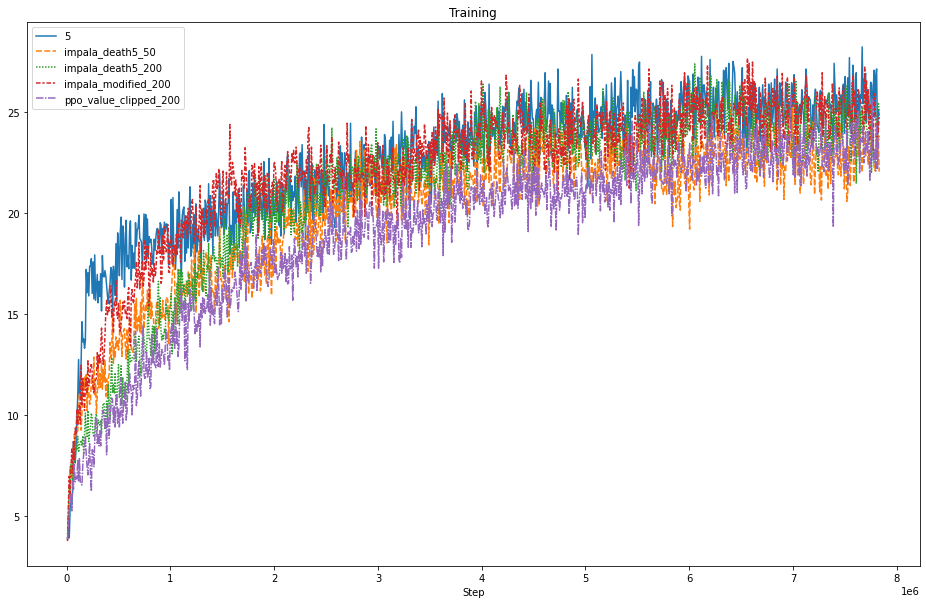

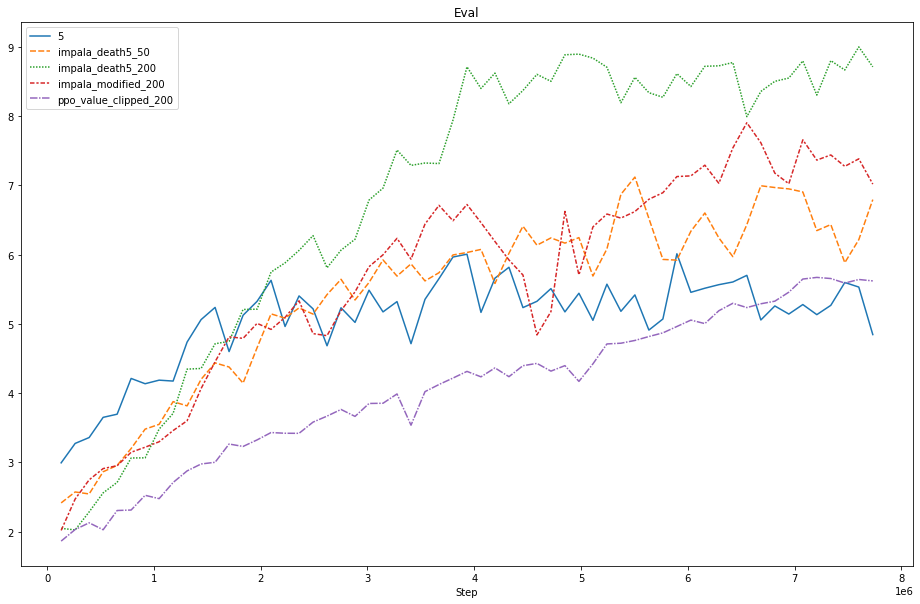

In [27]:
#impala death on 10 levels
chosen_files = [impala_death5, impala_death5_50, impala_death5_200, impala_modified_200, ppo_value_clipped_200]
plot_training_graphs(chosen_files, legend = legend)
plot_eval_graphs(chosen_files, legend = legend)

## Combined

In [79]:
def generate_df(file_names):
  base = 32*256
  df = pd.DataFrame(columns=file_names)
  
  # df['Step'] = pd.read_csv(DATA_PATH + INDEX["file_name"][0].strip()+".csv")["Step"]  #This only works as long as they all have the same steps!
  
  for file_name in file_names:
    df[file_name] = pd.read_csv(DATA_PATH + file_name+".csv")[" Mean reward"]
  max_length = len(df)  
  df.insert(0, "Step", [base*(i+1) for i in range(max_length)])
  df = df.set_index('Step')
  return df

def generate_eval_df(file_names):
  base = 32*256*16
  df = pd.DataFrame(columns=file_names)
  for file_name in file_names:
    temp = pd.read_csv(DATA_PATH + file_name+"_EVAL.csv")
    df[file_name] = temp["avg"]
  
  max_length = len(df)  
  df.insert(0, "Step", [base*(i+1) for i in range(max_length)])
  df = df.set_index('Step')
  return df

In [80]:
def plot_combined_10(ppos, impalas, impala_deaths, legend=None, title=""):
  fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,5))
  lw = 3
  n=16
  plt.rcParams.update({'font.size': 16})
  fig.subplots_adjust(wspace=0.1, hspace=None)

  df = generate_eval_df(ppos)
  #ppos 10 levels
  sns.lineplot(ax=axes[0], data = df, linewidth=lw)
  if legend is not None:
    axes[0].legend(labels=[legend[x] for x in ppos], prop={'size': n}, loc=2)
  axes[0].set_title("Nature CNN")
  axes[0].set_ylabel("Rewards")

  #impalas 10 levels
  df = generate_eval_df(impalas)
  sns.lineplot(ax=axes[1], data = df, linewidth=lw)
  if legend is not None:
    axes[1].legend(labels=[legend[x] for x in impalas], prop={'size': n}, loc=2)
  axes[1].set_title("IMPALA CNN")

  #impala DEATHS 10 levels
  df = generate_eval_df(impala_deaths)
  sns.lineplot(ax=axes[2], data = df, linewidth=lw)
  if legend is not None:
    axes[2].legend(labels=[legend[x] for x in impala_deaths], prop={'size': n}, loc=4)
  axes[2].set_title("IMPALA CNN with death penalty")

  # fig.suptitle(title)

In [81]:
def plot_combined(ppos, legend=None, title=""):
  fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5,5))
  lw = 3
  n=16
  plt.rcParams.update({'font.size': 16})
  fig.subplots_adjust(wspace=0.1, hspace=None)

  df = generate_df(ppos)
  #ppos 10 levels
  sns.lineplot(ax=axes, data = df, linewidth=lw)
  if legend is not None:
    axes.legend(labels=[legend[x] for x in ppos], prop={'size': n}, loc=4)
  axes.set_title("Training")
  axes.set_ylabel("Rewards")


  # fig.suptitle(title)

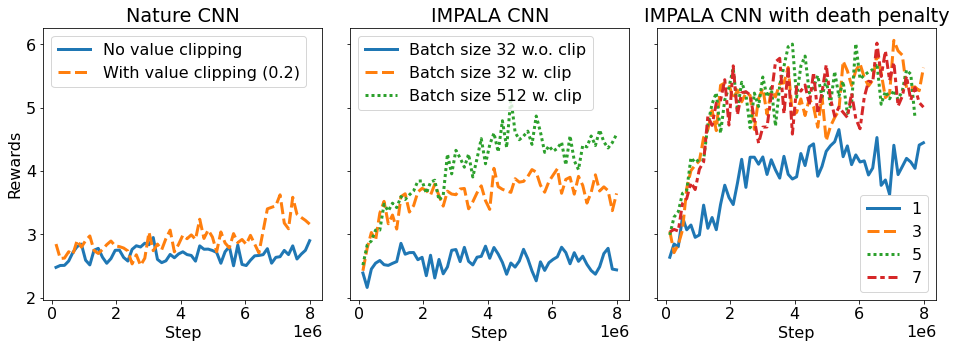

In [82]:
plot_combined_10([ppo_base, ppo_value_clipped],[impala_baseline, impala_value_clipped, impala_modified], [impala_death1, impala_death3, impala_death5, impala_death7], legend=legend, title='Test performance on 10 levels')

In [85]:
legend2= legend.copy()
files_10 = [ppo_value_clipped, impala_modified, impala_death5]
files_50 = [ppo_value_clipped_50, impala_modified_50, impala_death5_50]
files_200 = [ppo_value_clipped_200, impala_modified_200, impala_death5_200]

for file in files_10:
  legend2[file] = "10 levels"
for file in files_50:
  legend2[file] = "50 levels"
for file in files_200:
  legend2[file] = "200 levels"

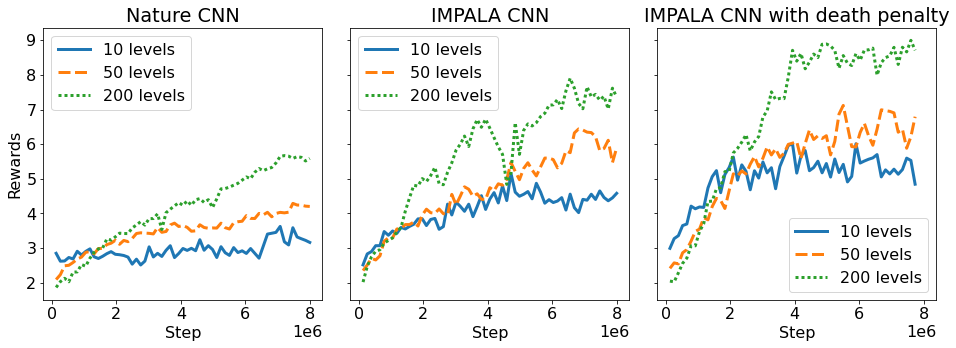

In [86]:
plot_combined_10([ppo_value_clipped, ppo_value_clipped_50, ppo_value_clipped_200],[impala_modified, impala_modified_50, impala_modified_200],[impala_death5, impala_death5_50, impala_death5_200],legend=legend2, title="Test performance on different levels")

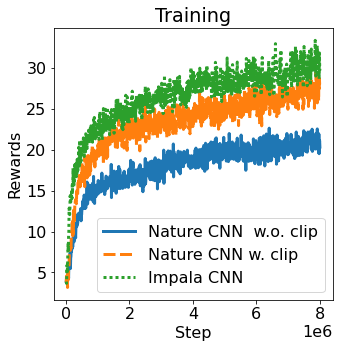

In [84]:
legend3 = legend.copy()
legend3[ppo_base] = "Nature CNN  w.o. clip"
legend3[ppo_value_clipped] = "Nature CNN w. clip "
legend3[impala_modified] = "Impala CNN"
legend3[impala_death5] = "Impala CNN DP 5"
plot_combined([ppo_base, ppo_value_clipped, impala_modified], legend=legend3, title='Test performance on 10 levels')

## New section

In [32]:
def plot_combined_10(ppos, impalas, impala_deaths, legend=None):
  fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,5))

  df = generate_eval_df(ppos)
  #ppos 10 levels
  sns.lineplot(ax=axes[0], data = df)
  if legend is not None:
    axes[0].legend(labels=[legend[x] for x in ppos])
  axes[0].set_title("Natures")

  #impalas 10 levels
  df = generate_eval_df(impalas)
  sns.lineplot(ax=axes[1], data = df)
  if legend is not None:
    axes[1].legend(labels=[legend[x] for x in impalas])
  axes[1].set_title("IMPALAs")

  #impala DEATHS 10 levels
  df = generate_eval_df(impala_deaths)
  sns.lineplot(ax=axes[2], data = df)
  if legend is not None:
    axes[2].legend(labels=[legend[x] for x in impala_deaths])
  axes[2].set_title("IMPALA w. DPs")

  fig.suptitle('Test performance on 10 levels')

#TO DO

## Experiments
* impala death 20 50 levels

## Code to implement
* Continue training (save models ever 1 M steps, make sure we can load and continue training)
* Test models on levels it has been trained on


## Remarks
* The number of levels evaluated on is the same as the number trained on

